In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import subspace_angles
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl
from auto_encodeur import *
from experience_plotting_function import *
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 19  
plt.rcParams['ytick.labelsize'] = 19 

# Expérience Comparaison auto-encodeur et PCA

In [2]:
X, y = load_digits(return_X_y=True)
X/=np.max(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
def entrainement_autoencodeur(X_train,X_test,epochs,hidden_layer_dim,lineaire):
    learning_rate=1/(np.linalg.norm(X_train)**2)
    input_dim=X_train.shape[1]
    if(lineaire):
        autoencoder = Autoencoder(input_dim, hidden_layer_dim, learning_rate, epochs)
        mse_train,mse_test=autoencoder.fit(X_train,X_test)
    return mse_train,mse_test,autoencoder

In [4]:
def comparaison_subspace_angles(X_train,X_test):
    '''comparaison selon le nombre d'époques d'entrainement'''
    pca=PCA.PCA()
    pca.fit(X_train.T)
    eigen_vectors=pca.get_eigen_vectors()
    #print(eigen_vectors)
    hidden_layer_dim=[30]
    epochs_range=[1,10,100,1000]
    n_premiers_vecteurs_propres_lineaire=[]
    n_derniers_vecteurs_propres_lineaire=[]
    
    n_premiers_vecteurs_propres_non_lineaire=[]
    n_derniers_vecteurs_propres_non_lineaire=[]
    
    for epochs in epochs_range:
        mse_train,mse_test,autoencoder=entrainement_autoencodeur(X_train,X_test,epochs,hidden_layer_dim,True)
        w=autoencoder.get_w()
        n_premiers_vecteurs_propres_lineaire.append(np.mean(subspace_angles(w[0][:,:],eigen_vectors[:,X_train.shape[1]-hidden_layer_dim[0]:])))
        n_derniers_vecteurs_propres_lineaire.append(np.mean(subspace_angles(w[0][:,:],eigen_vectors[:,:X_train.shape[1]-hidden_layer_dim[0]])))
    return epochs_range,n_premiers_vecteurs_propres_lineaire,n_derniers_vecteurs_propres_lineaire
epochs_range,n_premiers_vecteurs_propres_lineaire,n_derniers_vecteurs_propres_lineaire=comparaison_subspace_angles(X_train,X_test)


# Angle entre les sous espaces des vecteurs poids et 30 premiers vecteurs propres et 30 derniers vecteurs propres

## intuition en 3 dimension d'angle entre deux plans

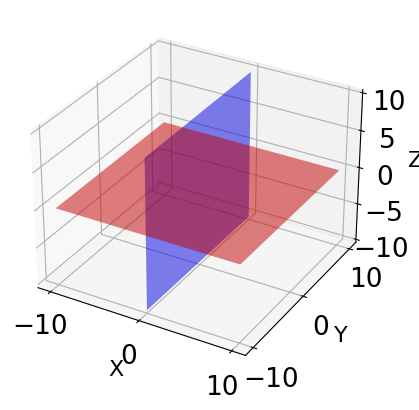

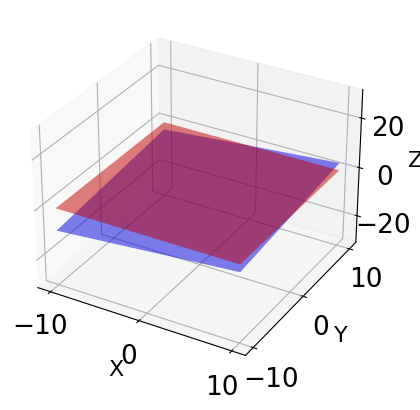

In [5]:
affichage_plan_orthogonal()
affichage_plan_proche()

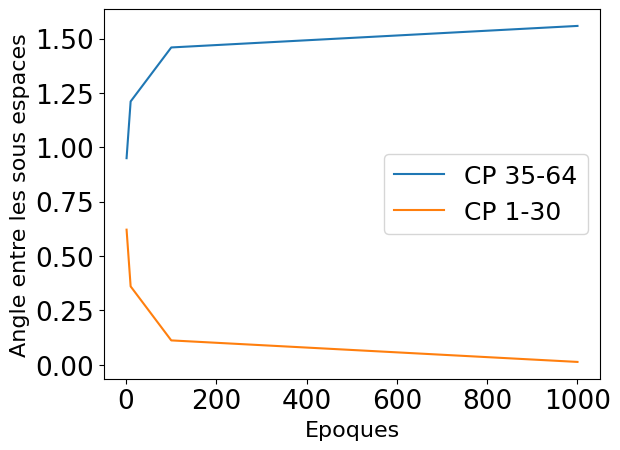

In [6]:
plt.plot(epochs_range,n_premiers_vecteurs_propres_lineaire,label='CP 35-64')
plt.plot(epochs_range,n_derniers_vecteurs_propres_lineaire,label='CP 1-30')
plt.xlabel('Epoques')
plt.ylabel('Angle entre les sous espaces')
plt.legend()
plt.savefig('images/subspace_angles.png',bbox_inches='tight')
plt.show()